<table align="left">
  <td>
    <a href="https://is.gd/Mv3FTa" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

 # Estudio Comparativo de Modelos de Clasificación para la Predicción de Rotación de Clientes en Bancos

 - Regresion Logística - Softmax
 - Árboles de Decisión
 - Support Vector Machine

    ## 1. Introducción
    En este estudio se comparan los modelos de clasificación de Regresión Logística, Árboles de Decisión y Support Vector Machine para la predicción de rotación de clientes en bancos. El conjunto de datos utilizado es el [Bank Churn Prediction](https://www.kaggle.com/code/prathameshchaudhary/bank-churn-prediction). El objetivo de este estudio es comparar los modelos de clasificación en términos de precisión, exactitud, sensibilidad y especificidad.

    ## 2. Metodología
    - El conjunto de datos contiene 10000 observaciones y 14 variables. El conjunto de datos se divide en un conjunto de entrenamiento y un conjunto de prueba. 
    - El conjunto de entrenamiento se utiliza para entrenar los modelos de clasificación y el conjunto de prueba se utiliza para evaluar los modelos de clasificación. 
    - Los modelos de clasificación se entrenan utilizando el conjunto de entrenamiento y se evalúan utilizando el conjunto de prueba. 
    - Los modelos de clasificación se evalúan utilizando las métricas de precisión, exactitud, sensibilidad y especificidad. 
        - La precisión es la proporción de predicciones correctas. 
        - La exactitud es la proporción de predicciones correctas para la clase positiva. 
        - La sensibilidad es la proporción de verdaderos positivos. 
        - La especificidad es la proporción de verdaderos negativos. 
    - Los modelos de clasificación se comparan en términos de precisión, exactitud, sensibilidad y especificidad.
    



In [27]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore")
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 1. Importar y Preparar los Datos

Etapa de importación y preprocesamiento de los datos. 
- Se utilizará pandas para crear un dataframe que contenga los datos. 
- Se observará la forma de los datos y se verificará si hay valores nulos.
- Se eliminarán atributos que no se utilizarán en el estudio.
- Se estandarizarán las variables numéricas.
- Se codificarán las variables categóricas según el tipo (nominales - ordinales).
- Se separarán los datos en atributos y etiquetas.
- Se dividirán los datos en un conjunto de entrenamiento y un conjunto de prueba.


In [28]:
datos = pd.read_csv("../Regresion-Clasificación/Churn_Modelling.csv")
datos.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [30]:
datos.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

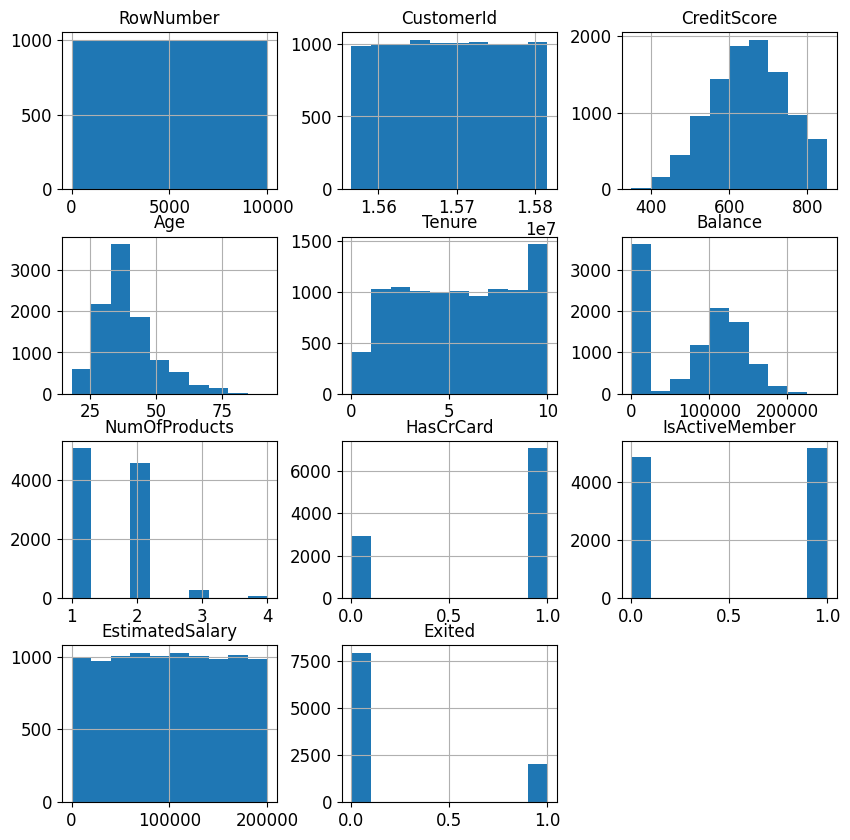

In [55]:
datos.hist(figsize=(10,10))
plt.show()

### 1.1 Conclusiones obtenidas de la etapa de exploración de los datos

- Se observa que no hay valores nulos en el conjunto de datos.
- Se observa que hay 14 variables y 10000 observaciones.
- Se observa que hay 11 variables numéricas y 3 variables categóricas.
- Se observa que hay 3 variables categóricas.
- Se observa que la clase objetivo Exited tiene 2 valores (0 y 1).
- Se observa que hay un desbalance en la clase objetivo Exited. Hay 7963 observaciones de la clase 0 y 2037 observaciones de la clase 1.
- Se observa que los atributos RowNumber, CustomerId y Surname no aportan información relevante para el estudio. **Se eliminarán estos atributos**.
- Se observa que los atributos CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary tienen valores que varían en diferentes rangos. **Se estandarizarán estos atributos**.


### 1.2 Drop de los atributos que no se utilizarán en el estudio

In [47]:
# Seleccionar las variables que se van a utilizar como objetivo y atributos

# Exited = objetivo
y = datos.iloc[:, 13]

# Drop RowNumber, CustomerId, Surname, Exited
X = datos.drop(['RowNumber', 'CustomerId', 'Surname', "Exited"], axis=1)


X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


### 1.3 Codificación de las variables categóricas
Se utilizará la codificación One-Hot para las variables categóricas Gender y Geography.


In [33]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)
X_ohe = ohe.fit_transform(X[["Geography", "Gender"]])
ohe.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [34]:
X_ohe = pd.DataFrame(X_ohe, columns = ohe.get_feature_names())
X_ohe.head()

,x0_France,x0_Germany,x0_Spain,x1_Female,x1_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0


### 1.4 Estandarización de las variables numéricas

In [51]:
from matplotlib.pyplot import axis
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(["Geography", "Gender"], axis=1))
X_scaled = pd.DataFrame(X_scaled, columns = X.drop(["Geography", "Gender"], axis=1).columns)
X_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


### 1.5 Unión de los datos codificados y estandarizados

In [52]:
df_X = pd.concat([X_scaled, X_ohe], axis=1)
df_X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_France,x0_Germany,x0_Spain,x1_Female,x1_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.0,0.0,0.0,1.0,0.0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0.0,0.0,1.0,1.0,0.0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.0,0.0,0.0,1.0,0.0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,1.0,0.0,0.0,1.0,0.0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0.0,0.0,1.0,1.0,0.0


### 1.6 División de los datos en entrenamiento y prueba

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2, random_state=42)
print("X Train: {}, X Test: {}, y_train: {}, y_test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X Train: (8000, 13), X Test: (2000, 13), y_train: (8000,), y_test: (2000,)


## 2. Funciones para entrenamiento y evaluación de los modelos de clasificación

### 2.1 Función para evaluar el desempaño de los modelos de clasificación

- Confusion Matrix:
- Classification Report:
- Cohen Kappa Score:
- AUROC Score: 


In [56]:
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score, accuracy_score  
from sklearn.metrics import roc_curve, roc_auc_score, f1_score,precision_score,recall_score  

In [57]:
def performanceCal(ytest, ypredict):
  """
    Calculation of performance metrics:
    - Confusion Matrix:
    - Accuracy Score: https://is.gd/YwoQJf
    - Precision Score: https://is.gd/Xz6Nu0
    - F1-Score: https://is.gd/YVGWCs
    - Recall Score: https://is.gd/9PUCgT 
    - Cohen Kappa Score:
    - AUROC Score: https://is.gd/JIAktb
    Arguments:
        ytest: ndarray - list
        ypredict: ndarray - list
    Returns:
        List with result of performance metrics: matrixconfu,accuracyscore,
        precisionscore,f1score,recallscore,cohenkappa,auroc_score
    """

  matrixconfu  = confusion_matrix(ytest, ypredict)
  matrixreport = classification_report(ytest, ypredict)
  
  accuracyscore = round(accuracy_score(ytest, ypredict),3)
  f1score = round(f1_score(ytest, ypredict, average='weighted'),3)
  precisionscore = round(precision_score(ytest, ypredict, average='weighted'),3)
  recallscore = round(recall_score(ytest, ypredict, average='weighted'),3)
  

  cohenkappa= round(cohen_kappa_score(ytest, ypredict),3)
  auroc_score = round(roc_auc_score(ytest, ypredict),3)


  result = [matrixconfu,matrixreport,accuracyscore,precisionscore,f1score,recallscore,cohenkappa,auroc_score]
  return result

### 2.2 Función para entrenar los modelos de clasificación

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from numpy import mean
from numpy import std

In [79]:
def modelClas(model,xtrain,ytrain,xtest):
  """
  Model Evaluation:

  Arguments:
      model: sklearn classifier model
      xtrain: ndarray - list
      ytrain: ndarray - list
      xtest: ndarray - list
  Returns:
      model predictions
  """
  model.fit(xtrain, ytrain)
  model_predic = model.predict(xtest)


  return model_predic

In [103]:
def heatmapgraph(data):
  ax = sns.heatmap(data, annot=True, fmt='.2f',cbar=False, cmap='Blues')
  ax.set_xlabel("Predicción")
  ax.set_ylabel("Real")

## 3.0 Entrenamiento y Evaluación de los Modelos de Clasificación

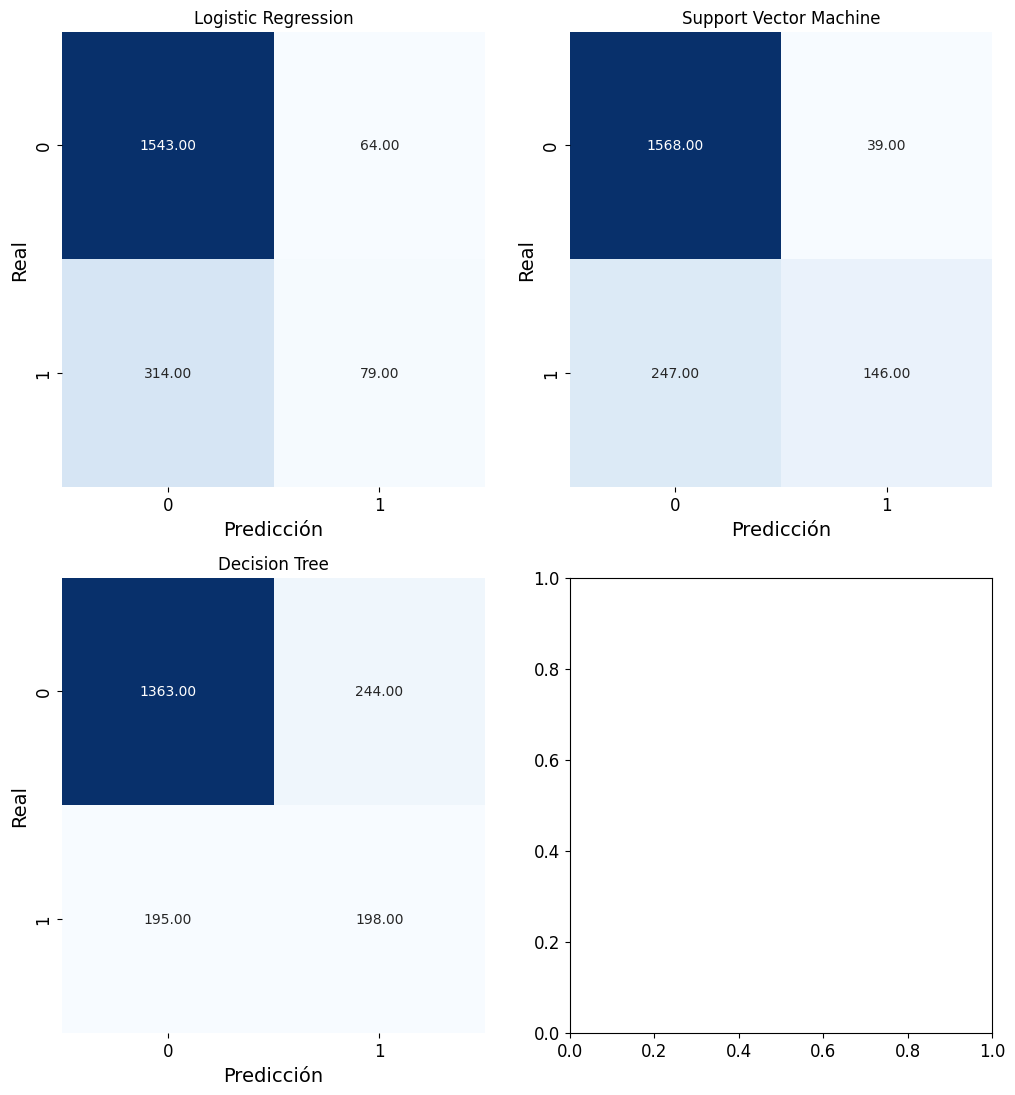

In [105]:
modelLR = LogisticRegression()
modelSVC = SVC()
modelDTC = DecisionTreeClassifier(random_state=0)

models=[modelLR,modelSVC,modelDTC]
plt.subplots(2,2,figsize=(12,13))
modelsNames = ["Logistic Regression","Support Vector Machine", "Decision Tree"]
metricsResults = []

for idx, model in enumerate(models):
  modelResults = modelClas(model,X_train,y_train,X_test)
  metrics = performanceCal(y_test,modelResults)
  
  metrics.insert(2,modelsNames[idx])
  metricsResults.append(metrics[2:])
  
  ax = plt.subplot(2,2,idx+1)
  ax.yaxis.set_ticklabels([])
  ax.set_title(modelsNames[idx])
  fig = heatmapgraph(metrics[0])
  
  #print('Classification report - ' + modelsNames[idx] + ": \n"  ,metrics[1])
  
  



In [98]:
#create data
data = [metricsResults[0],metricsResults[1],metricsResults[2]]
  
#define header names
col_names = ["Models", "Accuracy", "Precision","Recall", "F1-Score", "Cohen Kappa Score", "AUC ROC Score" ]
  
#display table
MC1_Results = pd.DataFrame(data=data, columns=col_names)
MC1_Results

,Models,Accuracy,Precision,Recall,F1-Score,Cohen Kappa Score,AUC ROC Score
0,Logistic Regression,0.811,0.776,0.774,0.811,0.212,0.581
1,Support Vector Machine,0.857,0.849,0.836,0.857,0.434,0.674
2,Decision Tree,0.780,0.791,0.785,0.780,0.336,0.676
